### Task 8:

Choose two algorithms from the mentioned sectiones of the book: "Introduction to Algorithms", Thomas H., Cormen Charles E., Leiserson Ronald L. et al. Analyse the chosen algorithms in terms of time and space complexity, design technique used, etc. Implement the algorithms and produce several experiments. Analyse the results.

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter as tpc


def data_gen(text_size, pattern_size):
    
    ''' the function generates a string (text) and 
        a substring from it (pattern) according to
        the specified lengths '''
    
    global alphabet
    alphabet_size, text = len(alphabet), ''
    
    for i in range(text_size):
        text += alphabet[np.random.randint(0, alphabet_size)]
        
    start_num = np.random.randint(0, text_size - pattern_size)
    pattern = text[start_num : start_num + pattern_size]
            
    return text, pattern

   
def naive_string_matcher(text, pattern):
    
    ''' Brute force search of the pattern in the text '''
    
    n, m =  len(text), len(pattern)
    pos_arr = []
    
    for i in range(n - m + 1):
        
        if pattern[:] == text[i : i + m]:
            pos_arr.append(i)
            
    return pos_arr


def rabin_karp_matcher(text, pattern):
    
    ''' This algorithm looks for a match of a substring
        with a pattern by comparing their hashes '''
    
    n, m = len(text), len(pattern)
    hpattern = hash(pattern)
    pos_arr = []
    
    for i in range(n - m + 1):
        
        hs = hash(text[i : i + m])
        
        if hs == hpattern:
            
            if pattern[:] == text[i : i + m]:
                
                pos_arr.append(i)
            
    return pos_arr


def prefix_func(s):
    
    ''' The prefix function of the string is calculated as the length
        of the largest proper (not equal to the entire substring) prefix
        of the substring., which is also the suffix of this substring. '''
    
    l = len(s)
    P = [0] * l
    i, j = 0, 1
    
    while j < l :
        
        if s[i] == s[j]:
            
            P[j] = i + 1
            i += 1
            j += 1
            
        elif i > 0:
            i = P[i - 1]
            
        else:
            P[j] = 0
            j += 1
            
    return P


def kmp_matcher(text, pattern):
    
    ''' This algorithm searches for a substring match 
        with a template using a prefix function '''
    
    n, m = len(text),len(pattern)
    P = prefix_func(pattern)
    
    i, j = 0, 0
    pos_arr = []
    
    while i < n and j < m:
        
        if text[i] == pattern[j]:
            
            if j == m - 1:
                pos_arr.append(i - m + 1)
                j = 0
            else:
                j += 1
            i += 1
            
        elif j > 0:
            j = P[j - 1]
            
        else:
            i += 1
            
    return pos_arr


if __name__ == '__main__':
    
    #alphabet = [chr(i) for i in range(97, 123)]
    alphabet = 'abcd'

    np.random.seed(9)    
    text, pattern = data_gen(30, 3)
    print(text, pattern, '\n')
    
    print(naive_string_matcher(text, pattern))
    print(rabin_karp_matcher(text, pattern))
    print(kmp_matcher(text, pattern))
    

cacbcadcbbcadacbabdbbaaacdacab cad 

[4, 10]
[4, 10]
[4, 10]


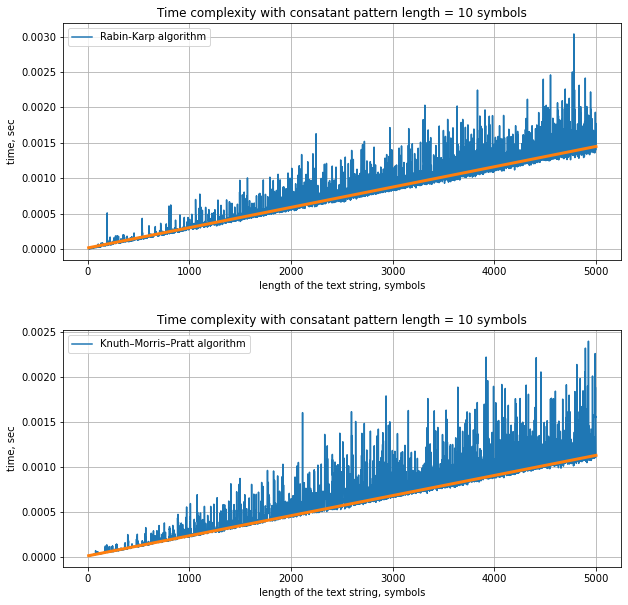

In [230]:
def const_time(n):
    return 1

def linear_time(n):
    return n

def poly_time(n):
    return n ** 2

def nlogn_time(n):
    return n * np.log(n)


alphabet = [chr(i) for i in range(97, 123)]
func_dict = {'Rabin-Karp algorithm': rabin_karp_matcher, 'Knuth–Morris–Pratt algorithm': kmp_matcher}
compl_dict = {'Rabin-Karp algorithm': linear_time, 'Knuth–Morris–Pratt algorithm': linear_time}

pattern_size = 10
min_num, max_num  = pattern_size + 1, 5000
fig = plt.subplots(2, 1, figsize = (10, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for func_name in func_dict.keys():
        
    time_arr = []

    for num in range(min_num, max_num):

            time_arr_curr = []

            for i in range(5):
                
                text, pattern = data_gen(num, pattern_size)
                
                start_time = tpc()
                func_dict[func_name](text, pattern)
                stop_time = tpc()

                time_arr_curr.append(stop_time - start_time)

            time_arr.append(np.mean(time_arr_curr))
            
    plt.subplot(2, 1, np.where([tmp == func_name for tmp in func_dict.keys()])[0][0] + 1)
    
    x = [num for num in range(min_num, max_num)]
    plt.plot(x, time_arr, label = func_name)
    
    # If theoretical time complexity for some f(...) is O(g(n)) => 
    # => have to search constant in equation: f(n) = f(0) + C * g(n) => 
    # => We can find C for any fixed n_i: C = (f(n_i) - f(0))/g(n_i) in such a way 
    # to show similar trends in theoretical and experimental time
    
    n_i = int(0.5 * len(time_arr))
    C = (time_arr[n_i] - time_arr[0])/compl_dict[func_name](n_i)

    y = [time_arr[0] + C * compl_dict[func_name](i) for i in x]
    plt.plot(x, y,  linewidth = 3.0)

    plt.title('Time complexity with consatant pattern length = {} symbols'.format(pattern_size))
    plt.xlabel('length of the text string, symbols')
    plt.ylabel('time, sec')
    plt.legend(loc = 'best')
    plt.grid()

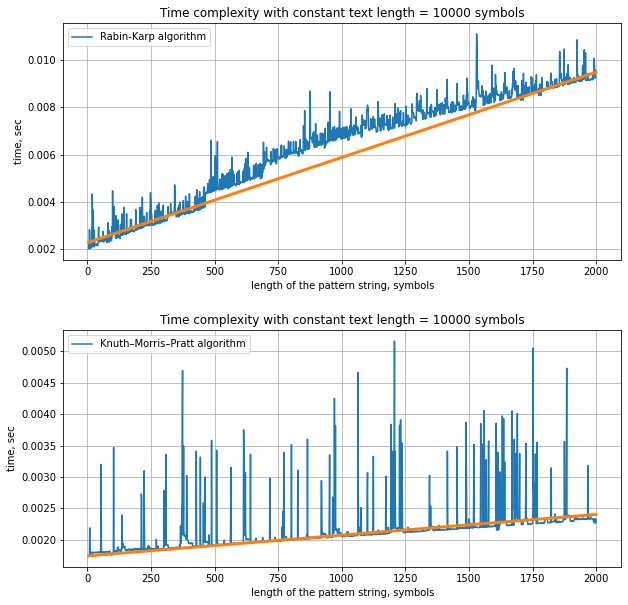

In [234]:
def searchstring_gen(len_str):
    
    global alphabet
    alphabet_size, search_str = len(alphabet), ''
    
    for i in range(len_str):
        search_str += alphabet[np.random.randint(0, alphabet_size)]
        
    return search_str


def substring_gen(search_str, len_str):
    
    global alphabet
    start_num = np.random.randint(0, len(search_str) - len_str)
       
    return search_str[start_num : start_num + len_str]
    

text_size = 10000
min_num, max_num  = 5, 2000

fig = plt.subplots(2, 1, figsize = (10, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

text = searchstring_gen(text_size)
    
for func_name in func_dict.keys():
        
    time_arr = []

    for num in range(min_num, max_num):

            time_arr_curr = []

            for i in range(5):
                
                pattern = substring_gen(text, num)
                
                start_time = tpc()
                func_dict[func_name](text, pattern)
                stop_time = tpc()

                time_arr_curr.append(stop_time - start_time)

            time_arr.append(np.mean(time_arr_curr))
            
    plt.subplot(2, 1, np.where([tmp == func_name for tmp in func_dict.keys()])[0][0] + 1)
    x = [num for num in range(min_num, max_num)]
    plt.plot(x, time_arr, label = func_name)
    
    # If theoretical time complexity for some f(...) is O(g(n)) => 
    # => have to search constant in equation: f(n) = f(0) + C * g(n) => 
    # => We can find C for any fixed n_i: C = (f(n_i) - f(0))/g(n_i) in such a way 
    # to show similar trends in theoretical and experimental time
    
    n_i = int(0.9 * len(time_arr))
    C = (time_arr[n_i] - time_arr[0])/compl_dict[func_name](n_i)

    y = [time_arr[0] + C * compl_dict[func_name](i) for i in x]
    plt.plot(x, y,  linewidth = 3.0)

    plt.title('Time complexity with constant text length = {} symbols'.format(text_size))
    plt.xlabel('length of the pattern string, symbols')
    plt.ylabel('time, sec')
    plt.legend()
    plt.grid()